# Week 3: Clustering


In this workshop, we will work through a set of problems clustering, another cannonical form of unsupervised learning. Clustering is an important tool that is used to discover homogeneous groups of data points within a heterogeneous population. It can be the main goal in some problems, while in others it may be used in EDA to understand the main types of behavior in the data or in feature engineering.   

We will start by generating some artificial data, and then we will utilize clustering algorithms described in lectures and explore the impact of feature engineering on the solution. We will then attempt to find clusters in a gene expression dataset. 

As usual, the worksheets will be completed in teams of 2-3, using **pair programming**, and we have provided cues to switch roles between driver and navigator. When completing worksheets:

>- You will have tasks tagged by (CORE) and (EXTRA). 
>- Your primary aim is to complete the (CORE) components during the WS session, afterwards you can try to complete the (EXTRA) tasks for your self-learning process. 
>- Look for the 🏁 as cue to switch roles between driver and navigator.

Instructions for submitting your workshops can be found at the end of worksheet. As a reminder, you must submit a pdf of your notebook on Learn by 16:00 PM on the Friday of the week the workshop was given. 

As you work through the problems it will help to refer to your lecture notes (navigator). The exercises here are designed to reinforce the topics covered this week. Please discuss with the tutors if you get stuck, even early on! 

## Outline

1. [Problem Definition and Setup: Simulated Example](#setup1)
2. [K-means: Simulated Example](#kmeans1)
3. [Hierarchical Clustering: Simulated Example](#hc)
4. [Gene Expression Data](#genedata)
5. [Hierarchical Clustering: Gene Expression Data](#hc_genedata)
6. [K-means Clustering: Gene Expression Data](#kmeans_genedata)

# Problem Definition and Setup: Simulated Example <a id='setup1'></a>

## Packages

First, lets load in some packages to get us started. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler


## Data: Simulated Example

We will begin with a simple simulated example in which there are truly three clusters. We assume that there are $D=2$ features and within each cluster, the data points are generated from a spherical normal distribution $N(\mathbf{m}_k, \sigma^2_k \mathbf{I})$ for clusters $k=1,2,3$, where both the mean $\mathbf{m}_k$ and variance $\sigma^2_k$ are different across clusters. Specifically, we assume that: 

* Cluster 1: contains $|C_1|=500$ points with mean vector $\mathbf{m}_1 = \begin{pmatrix} 0 \\ 4 \end{pmatrix}$ with standard deviation $\sigma_1 = 2$.
* Cluster 2: contains $|C_2|=250$ points with mean vector $\mathbf{m}_2 = \begin{pmatrix} 0 \\ -4 \end{pmatrix}$ with standard deviation $\sigma_2 = 1$.
* Cluster 3: contains $|C_3|=100$ points with mean vector $\mathbf{m}_3 = \begin{pmatrix} -4 \\ 0 \end{pmatrix}$ with standard deviation $\sigma_3 = 0.5$.

###  Exercise 1 (CORE)

Generate the dataset described above and store it in array called `X`.

Visualise your data and color by the true cluster labels.

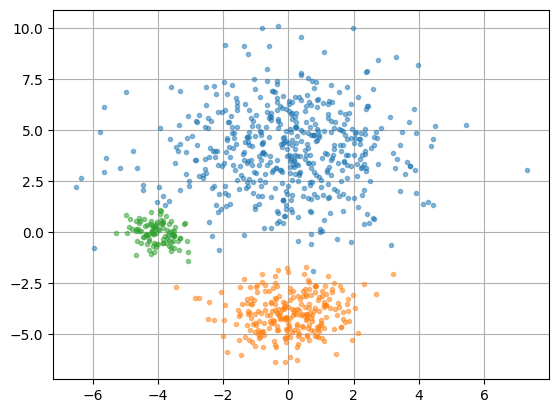

In [2]:
#generate dataset
c_1 = np.random.normal(loc=[0, 4], scale=2, size=(500, 2))
c_2 = np.random.normal(loc=[0, -4], scale=1, size=(250, 2))
c_3 = np.random.normal(loc=[-4, 0], scale=0.5, size=(100, 2))

#merge dataset
X = []
X.append(c_1)
X.append(c_2)
X.append(c_3)

#plot dataset 
for i in range(3):
    plt.plot(X[i][:, 0], X[i][:, 1],'.', alpha=0.5)
plt.grid()
plt.show()

X = np.concatenate((c_1, c_2, c_3), axis=0)



# K-means Clustering: Simulated Example <a id='kmeans1'></a>

To perform K-means clustering, we will use `KMeans()` in `sklearn.cluster`. Documentation is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), and for an overview of clustering methods available in `sklearn`, see [link](https://scikit-learn.org/stable/modules/clustering.html). There are different inputs we can specify when calling `KMeans()` such as:

- `n_clusters`: the number of clusters. 
- `init`: which specifies the intialization of the centroids, e.g. can be set to `k-means++` for K-means++ initialization or `random` for random initialization.
- `n_init`: which specifies the number of times the algorithm is run with different random initializations
- `random_state`: this can bet set to a fixed number to make results reproducible.

We can then use the `.fit()` method of `KMeans` to run the K-means algorithm on our data.

After fitting, some of the relevant attributes of interest include:

- `labels_`: cluster assignments of the data points.
- `cluster_centers_`: mean corresponding to each cluster, stored in a matrix of size: number of clusters $K$ times number features $D$.
- `inertia_`: the total within-cluster variation.

###  Exercise 2 (CORE)

Let's start by exploring how the clustering changes across the K-means iterations. To do, set:

- number of clusters to 3
- initialization to random
- number of times the algorithm is run to 1
- fix the random seed to a number of your choice (e.g. 2)


a) Now, fit the K-means algorithms with different values of the maximum number of iterations fixed to 1,2,3, and the default value of 300. 

b) Plot the clustering solution for the four different cases and comment on how it changes. 

c) How many iterations are needed for the convergence?

In [3]:
# Part a
C = 3

Ks1 = KMeans(C, init = 'random', n_init = 1, max_iter = 1, random_state = 2)
Ks2 = KMeans(C, init = 'random', n_init = 1, max_iter = 2, random_state = 2)
Ks3 = KMeans(C, init = 'random', n_init = 1, max_iter = 3, random_state = 2)
Ks4 = KMeans(C, init = 'random', n_init = 1, max_iter = 300, random_state = 2)

labels1 = Ks1.fit_predict(X)
labels2 = Ks2.fit_predict(X)
labels3 = Ks3.fit_predict(X)
labels4 = Ks4.fit_predict(X)

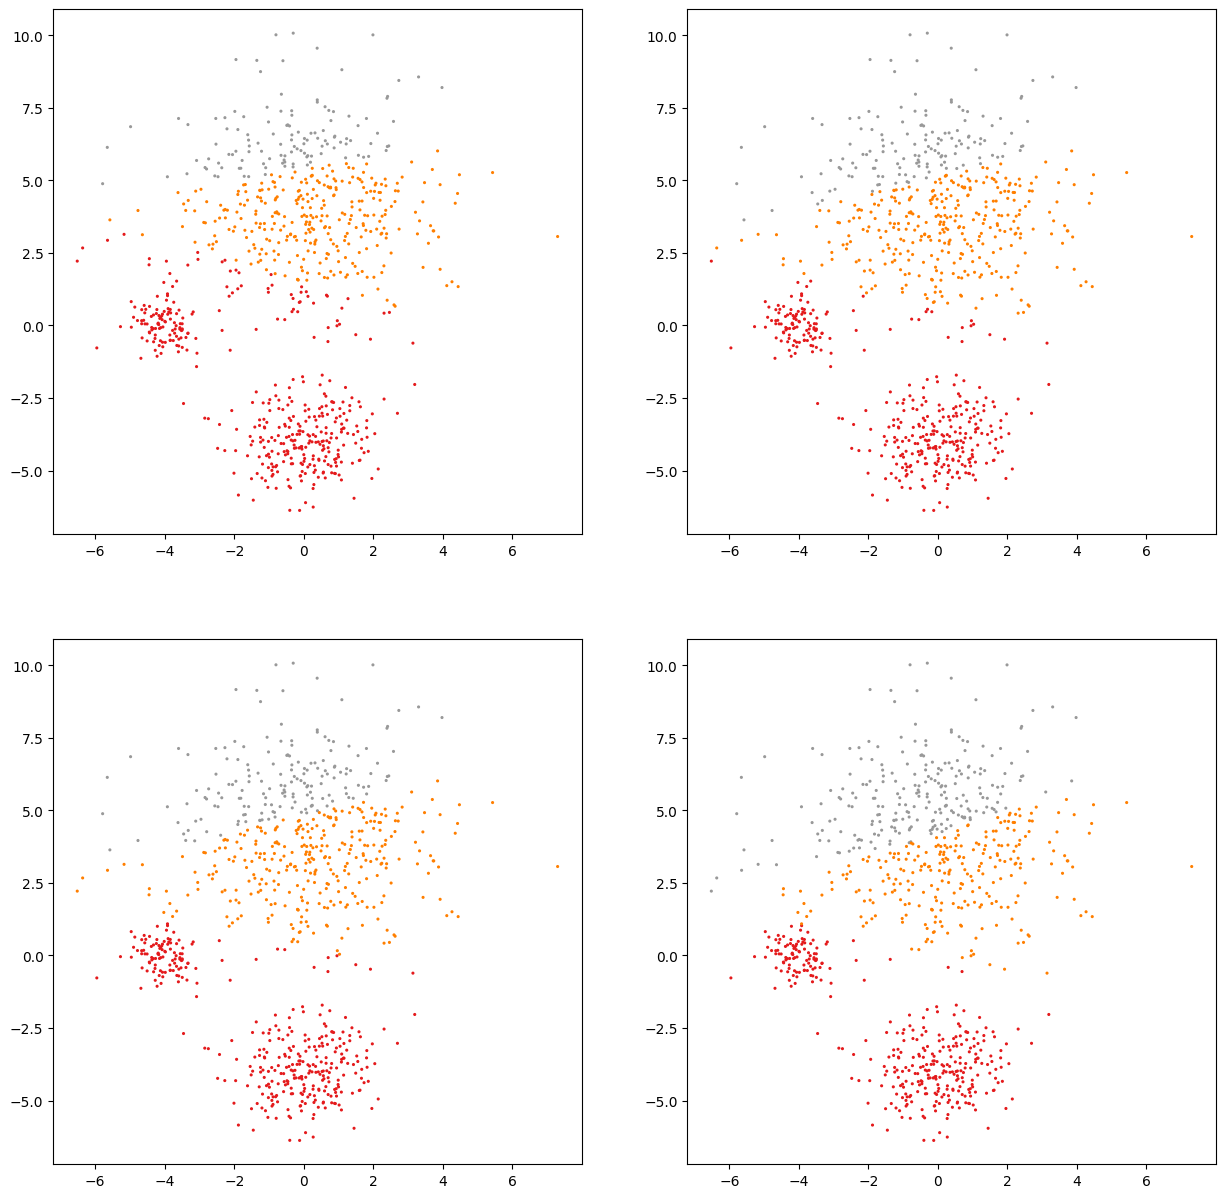

In [4]:
# Part b

fig, ax = plt.subplots(2,2, figsize = (15,15))
ax = ax.flatten()

ax[0].scatter(X[:,0], X[:,1], c = labels1, s=1.5, cmap='Set1')
ax[1].scatter(X[:,0], X[:,1], c = labels2, s=1.5, cmap='Set1')
ax[2].scatter(X[:,0], X[:,1], c = labels3, s=1.5, cmap='Set1')
ax[3].scatter(X[:,0], X[:,1], c = labels4, s=1.5, cmap='Set1')

The main difference with more iterations is that the red cluster shrinks (this observation was based on the first run)

After several re-runs, we can see, that clustering slowly converges to the original data clustering generated in the beginning.  

In [5]:
# Part c

Kmeans_obj = KMeans(3, init = 'random', n_init = 1,  random_state = 2)
labels_plus = Kmeans_obj.fit_predict(X)
print("Number of iterations needed for convergence:", Kmeans_obj.n_iter_)

Number of iterations needed for convergence: 9


###  Exercise 3 (CORE)

Next, compare the random intialization with K-means++ (in this case fix the number of different initializations to 10). Plot both clustering solutions. Which requires fewer iterations? and which provides a lower within-cluster variation?

Means random number of iterations:  12
Means plus number of iterations:  13

Means of within-cluster variation with random initialisation 3848.505653841638
Means of within-cluster variation with plus initialisation 3848.5056538416384


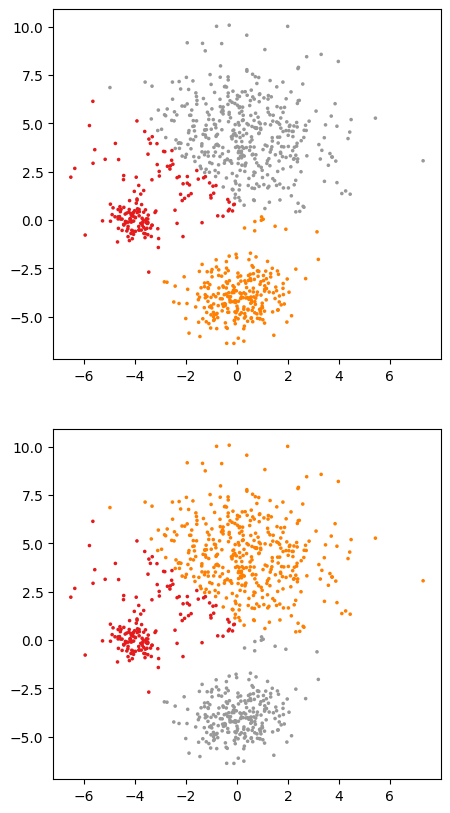

In [6]:

fig, axs = plt.subplots(2, figsize = (5,10))

#perform clustering and plot results with random initialisation 
Krandom = KMeans(3, init = 'random', n_init = 10, random_state = 2)
labels_random = Krandom.fit_predict(X)
axs[0].scatter(X[:,0], X[:,1], c = labels_random, s=2.5, cmap='Set1')

#perform clustering and plot results with k-means++ initialisation 
Kplus = KMeans(3, init = 'k-means++', n_init = 10, random_state = 2)
labels_plus = Kplus.fit_predict(X)
axs[1].scatter(X[:,0], X[:,1], c = labels_plus, s=2.5, cmap='Set1')



print('Means random number of iterations: ',Krandom.n_iter_)
print('Means plus number of iterations: ', Kplus.n_iter_)
print()
print('Means of within-cluster variation with random initialisation', Krandom.inertia_)
print('Means of within-cluster variation with plus initialisation', Kplus.inertia_)

As we can see, while the within-cluster data variation is the same, with 'plus' initialisation Kmeans algorithm converges faster i.e. with fewer iterations

###  Exercise 4 (CORE)

Find the clustering solution using a different number of initializations equal to 1, 2, 5, 10, and 20. Visualize and comment on the results. Try changing the random state; how does that change your conclusions?


 3848.5056538416375 
 3848.505653841638 
 3848.5056538416375 
 3848.5056538416375 
 3848.5056538416375 
 


 4 
 4 
 4 
 4 
 4 
 


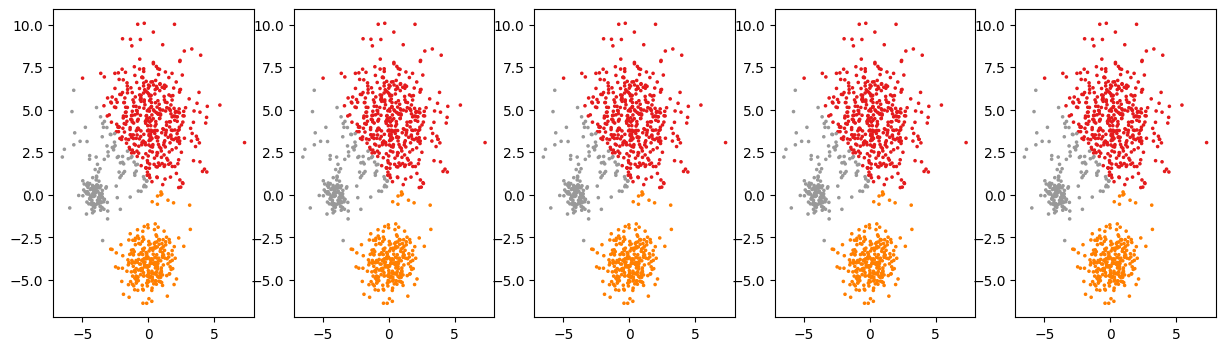

In [7]:
rnd_s = 100

Kmeansinit1 = KMeans(3, init = 'k-means++', n_init = 1, random_state = rnd_s)
Kmeansinit2 = KMeans(3, init = 'k-means++', n_init = 2, random_state = rnd_s)
Kmeansinit3 = KMeans(3, init = 'k-means++', n_init = 5, random_state = rnd_s)
Kmeansinit4 = KMeans(3, init = 'k-means++', n_init = 10, random_state = rnd_s)
Kmeansinit5 = KMeans(3, init = 'k-means++', n_init = 20, random_state = rnd_s)

labels1 = Kmeansinit1.fit_predict(X)
labels2 = Kmeansinit2.fit_predict(X)
labels3 = Kmeansinit3.fit_predict(X)
labels4 = Kmeansinit4.fit_predict(X)
labels5 = Kmeansinit5.fit_predict(X)

fig, axs = plt.subplots(1,5, figsize = (15,4))
axs[0].scatter(X[:,0], X[:,1], c = labels1, s=2.5, cmap='Set1')
axs[1].scatter(X[:,0], X[:,1], c = labels2, s=2.5, cmap='Set1')
axs[2].scatter(X[:,0], X[:,1], c = labels3, s=2.5, cmap='Set1')
axs[3].scatter(X[:,0], X[:,1], c = labels4, s=2.5, cmap='Set1')
axs[4].scatter(X[:,0], X[:,1], c = labels5, s=2.5, cmap='Set1')

print("\n",
      Kmeansinit1.inertia_, "\n",
      Kmeansinit2.inertia_, "\n",
      Kmeansinit3.inertia_, "\n",
      Kmeansinit4.inertia_, "\n",
      Kmeansinit5.inertia_, "\n", "\n")

print("\n",
      Kmeansinit1.n_iter_, "\n",
      Kmeansinit2.n_iter_, "\n",
      Kmeansinit3.n_iter_, "\n",
      Kmeansinit4.n_iter_, "\n",
      Kmeansinit5.n_iter_, "\n", "\n")

As discussed with Ozan and Sara during the workshop on Monday, the results are not-informative to draw any meaningful conclusions. Changing random seed and regenerating the data doesn't seem to bring any notable difference. 

🏁 **Now, is a good point to switch driver and navigator**

###  Exercise 5 (CORE)

Since we simulated the data, we know the true number of clusters. However, in practice this number is rarely known. Find the K-means solution with different choices of $K$ and plot the within-cluster variation as a function of $K$. Comment on the results.

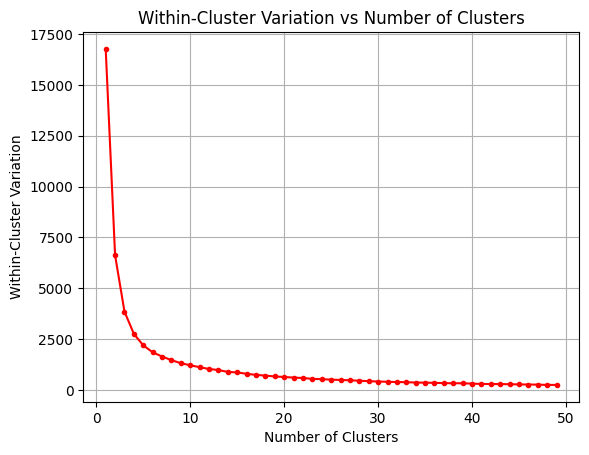

In [8]:
clusters = []
wcv = []

for i in range(49):
    Kmeansobj = KMeans(i+1, init = 'k-means++', n_init = 5, random_state = 2).fit(X)
    clusters.append(i+1)
    wcv.append(Kmeansobj.inertia_)
    
plt.plot(clusters, wcv, marker='o', linestyle='-', markersize = 3, color = 'red')
plt.title('Within-Cluster Variation vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Variation')
plt.grid(True)
plt.show()

From the plot above we can see, that adding three clusters dramatically decreases the within-cluster variation. However, adding more than 3 clusters, has only a small effect, with each next cluster having less and less effect. This matches our generated data in which we had exactly three clusters. 

###  Exercise 6 (CORE)

Now standardize the data and re-run the K-means algorithm. Qualitatively, how has standardising the data impacted performance? Can you argue why you observe what you see?

489.9474193428241


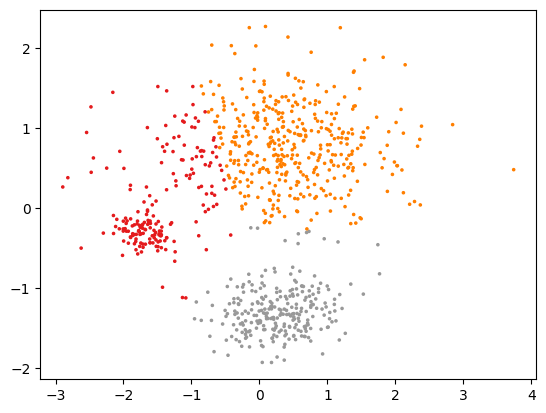

In [9]:
scaler = StandardScaler()
standardized_X = scaler.fit_transform(X)

standardized_kmeans = KMeans(3, init = 'k-means++', n_init = 5, random_state = 200).fit(standardized_X)
standardized_labels = standardized_kmeans.fit_predict(standardized_X)

print(standardized_kmeans.inertia_)
plt.scatter(standardized_X[:,0], standardized_X[:,1], c = standardized_labels, s = 2.5, cmap ='Set1')

As seen in the results above, the within-cluster variation is significantly lower. For this dataset, standardising data decreases the variation from 5 to 10 times. 

However, we can also observe that the final clustering is different compared to the one without standardisation. For instance, much of the 'orange' cluster was consumed by the 'red' cluster.

From this we can deduce, that the final result is less accurate and produces less accurate results compared to un-standardised. This happens because by standardising data we loose some of the information. 

# Hierarchical Clustering: Simulated Example <a id='hc'></a>

To perform hierarchical clustering, we will use the [`linkage()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function from `scipy.cluster.hierarchy`. The inputs to specify include

-  the data. 
- `metric`: specifies the dissimarlity between data points. Defaults to the Euclidean distance.
- `method`: specifies the type of linkage, e.g. complete, single, or average.

Then, we can use [`dendrogram()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) from `scipy.cluster.hierarchy` to plot the dendrogram.

###  Exercise 7 (CORE)

a) Use hierarchical clustering with complete linkage to cluster the simulated data.

In [10]:
# Either the name of the returned object from hierarchy.linkage should be hc_comp, or change the name in part b
hc_comp = hierarchy.linkage(X, method = 'complete')

b) Plot the dendogram by running the code below. Try changing the 'color_threshold' to a number (e.g. 11) to color the branches of the tree below the threshold with different colors, thus, identifying the clusters if the tree were to be cut at that threshold.

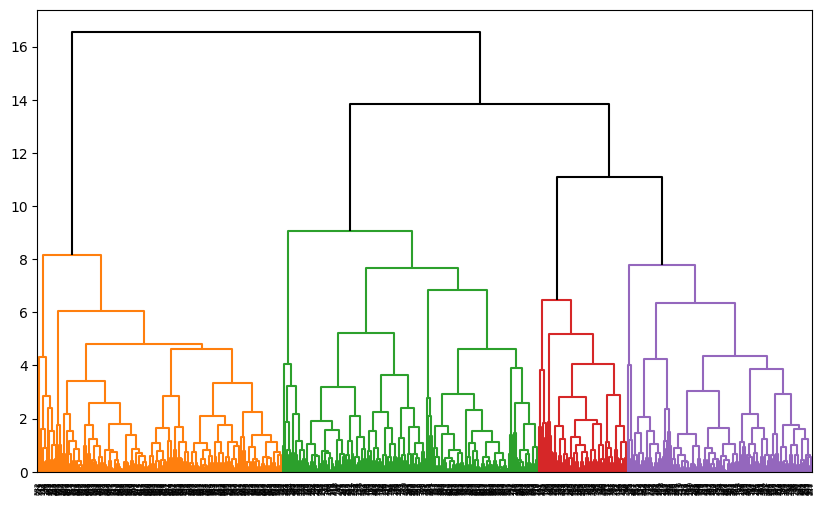

In [11]:
# You may need to replace hc_comp with your chosen name for the returned object from hierarchy.linkage in part a
cargs = {'color_threshold': 11,'above_threshold_color':'black'}
fig, ax = plt.subplots(1, 1, figsize=(10,6))
hierarchy.dendrogram(hc_comp, ax=ax, **cargs)
plt.show()

c) Now, use the function `cut_tree()` from `scipy.cluster.hierarchy` to determine the cluster labels associated with a given cut of the dendrogram. You can either specify the number of clusters via `n_clusters` or the height/threshold at which to cut via `height`. Plot the data colored by cluster membership.

1461.479749602346


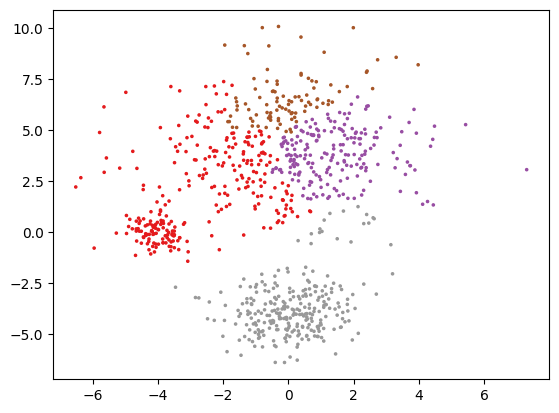

In [12]:
labelscomp = hierarchy.cut_tree(hc_comp, height = 10)
kmeanscomp = KMeans(init = 'k-means++', n_init = 5, random_state = 200).fit(X)

plt.scatter(X[:,0], X[:,1], c = labelscomp, s = 2.5, cmap ='Set1')
print(kmeanscomp.inertia_)

###  Exercise 8 (CORE)

Now try changing the linkage to single and average. Does this affect on the results?

The within-cluster variability with single  linkage is: 1461.4797496023457
The within-cluster variability with average linkage is: 1461.4797496023457


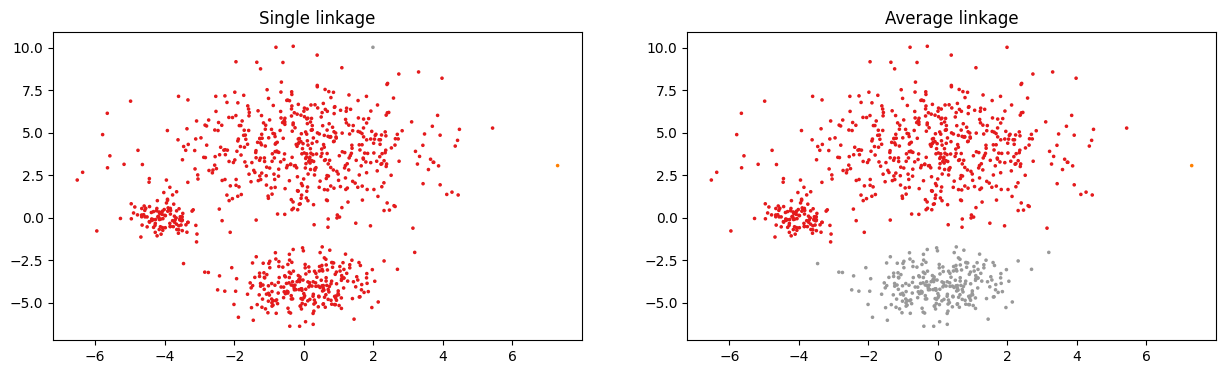

In [13]:
hc_single = hierarchy.linkage(X, method = 'single')
labels_single = hierarchy.cut_tree(hc_single, n_clusters = 3)
kmeans_single = KMeans(init = 'k-means++', n_init = 5, random_state = 200).fit(X)


hc_average = hierarchy.linkage(X, method = 'average')
labels_average = hierarchy.cut_tree(hc_average, n_clusters = 3)
kmeans_average = KMeans(init = 'k-means++', n_init = 5, random_state = 200).fit(X)

fig, axs = plt.subplots(1,2, figsize = (15,4))
axs[0].scatter(X[:,0], X[:,1], c = labels_single, s=2.5, cmap='Set1')
axs[0].set_title('Single linkage')
axs[1].scatter(X[:,0], X[:,1], c = labels_average, s = 2.5, cmap ='Set1')
axs[1].set_title('Average linkage')

print("The within-cluster variability with single  linkage is: " + str(kmeans_single.inertia_))
print("The within-cluster variability with average linkage is: " + str(kmeans_average.inertia_))

🏁 **Now, is a good point to switch driver and navigator**

# Gene Expression Data <a id='genedata'></a>

Now, we will consider a more complex real dataset with a larger feature space. 

The dataset is the **NCI cancer microarray dataset** discussed in both *Introduction to Statistical Learning* and  *Elements of Statistical Learning*. The dataset consists of $D=6830$ gene expression measurements for each of $N=64$ cancer cell lines. The aim is to determine whether there are groups among the cell lines based on their gene expressions. This is an example of a high-dimensional dataset with $D$ much larger than $N$, which makes visualization difficult. The $N=64$ cancer cell lines have been obtained from samples of cancerous tisses, corresponding to 14 different types of cancer. However, our focus remains unsupervised learning and we will use the cancer labels only to plot. 

We first need to read in the dataset.

In [14]:
#Fetch the data and cancer labels
url_data = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/nci.data.csv'
url_labels = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/nci.label.txt'

X = pd.read_csv(url_data)
y = pd.read_csv(url_labels, header=None)

# clean data and follow convention in the notes that features are columns:
X = X.drop(labels='Unnamed: 0', axis=1).T

In [15]:
X.shape

(64, 6830)

In [16]:
y.shape

(64, 1)

Let's visualise the data with a contour plot.

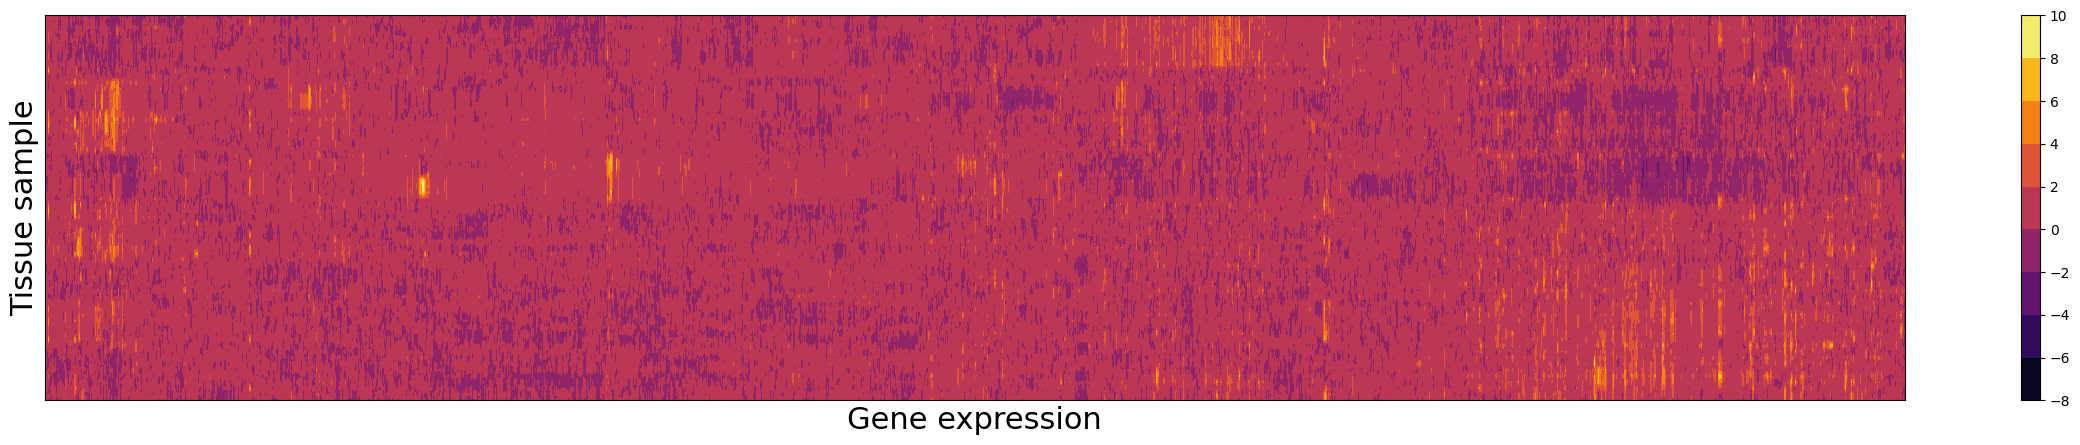

In [17]:
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(111)
contours = ax.contourf(X, cmap='inferno')#, vmax=4, vmin=-4)
cbar = plt.colorbar(contours)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Gene expression", fontsize=22)
ax.set_ylabel("Tissue sample", fontsize=22)
plt.show()

We now convert our pandas dataframe into a numpy array and create integer labels for cancer type (for plotting purposes)

If you visualise the labels, you will notice there are lots of inconsistencies with white space etc. Run the following code to clean the labels.

In [18]:
y.value_counts()

0                         
OVARIAN                       4
RENAL                         4
MELANOMA                      3
COLON                         3
NSCLC                         3
BREAST                        2
CNS                           2
BREAST                        2
NSCLC                         2
NSCLC                         2
RENAL                         2
PROSTATE                      2
CNS                           2
MELANOMA                      2
LEUKEMIA                      2
COLON                         2
MELANOMA                      2
BREAST                        1
BREAST                        1
BREAST                        1
CNS                           1
LEUKEMIA                      1
COLON                         1
COLON                         1
MCF7D-repro                   1
LEUKEMIA                      1
LEUKEMIA                      1
MCF7A-repro                   1
LEUKEMIA                      1
K562A-repro                   1
K562B-repro  

In [19]:
y_clean = np.asarray(y).flatten()
for j in range(y_clean.size):
    y_clean[j] = y_clean[j].strip()
np.unique(y_clean, return_counts = True)
cancer_types = list(np.unique(y_clean))
cancer_groups = np.array([cancer_types.index(lab) for lab in y_clean])

In [20]:
X_array = np.asarray(X)

###  Exercise 9 (EXTRA)

Perform a PCA of $\mathbf X$ to visualize the data. Plot the first few principal component scores and color by cancer type. Do cell lines within the same cancer types seems to have similar scores? Make a scree plot of the proportion of variance explained. How many components does this suggest?

# Hierarchical Clustering: Gene Expression Data <a id='hc_genedata'></a>

Now, let's perform hierarchical clustering on the gene expression data. 

###  Exercise 10 (CORE)

a) Plot the dendrogram with complete, single, and average linkage. Does the choice of linkage affect the results? Which linkage would you choose?

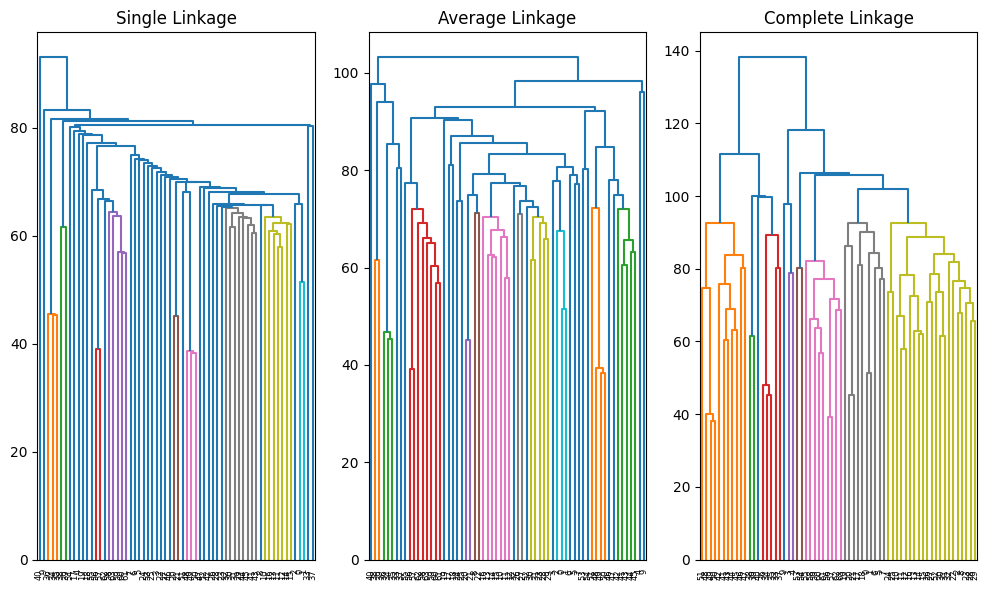

In [21]:
cancer_single = hierarchy.linkage(X_array, method = 'single')
cancer_average = hierarchy.linkage(X_array, method = 'average')
cancer_complete = hierarchy.linkage(X_array, method = 'complete')

cargs = {'color_threshold': 110,'above_threshold_color':'black'}
fig, ax = plt.subplots(1, 3, figsize=(10,6))
hierarchy.dendrogram(cancer_single, ax=ax[0])
ax[0].set_title('Single Linkage')

hierarchy.dendrogram(cancer_average, ax=ax[1])
ax[1].set_title('Average Linkage')

hierarchy.dendrogram(cancer_complete, ax=ax[2])
ax[2].set_title('Complete Linkage')

plt.tight_layout()
plt.show()

Choice of linkage clearly affects the results as we can see in the plots above. Complete linkage seems to work the best is this case since it has more homogeneous clustering.

b) Select a linkage and a number of clusters (by examining the dendrogram and jumps in the heights of the clusters merged). Plot the dendogram and color the branches to identify the clusters. Use the option `labels = np.asarray(y_clean), leaf_font_size=10` in `hierarchy.dendrogram` to add the cancer types as labels for each data point. Do you observe any patterns between the clusters and cancer types?

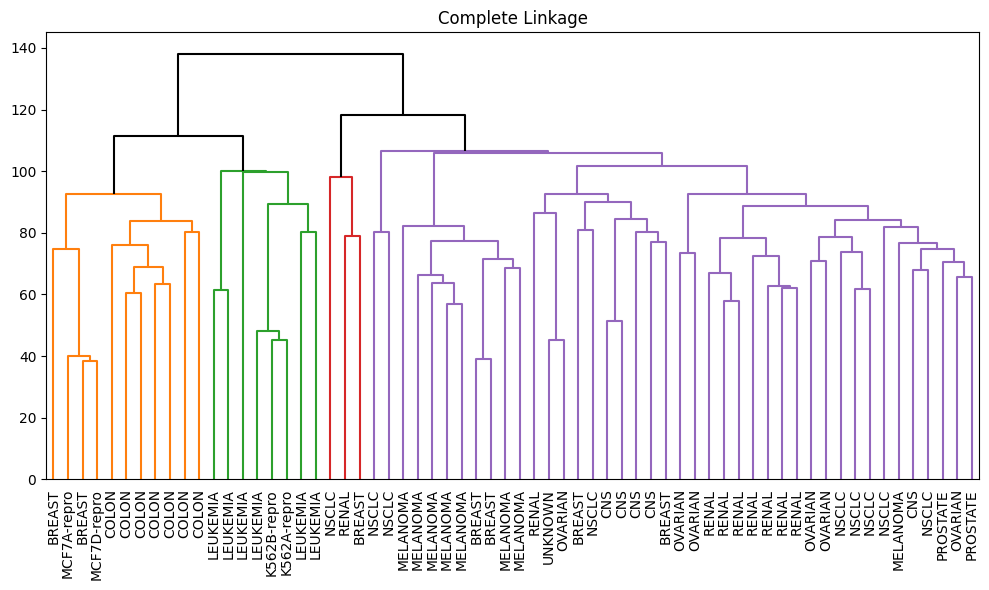

In [22]:
cancer_complete = hierarchy.linkage(X_array, method = 'complete')
cargs = {'color_threshold': 110,'above_threshold_color':'black'}
fig, ax = plt.subplots(1, 1, figsize=(10,6))

hierarchy.dendrogram(cancer_complete, ax=ax, **cargs, labels = np.asarray(y_clean), leaf_font_size=10)
ax.set_title('Complete Linkage')

plt.tight_layout()
plt.show()


There overall is a good correlation between cancer type and its cluster. However, some of the different cluster seems to have merged into one.

🏁 **Now, is a good point to switch driver and navigator**

# K-means Clustering: Gene Expression Data <a id='kmeans_genedata'></a>

Now, let's perform k-means clustering on the gene expression data.

###  Exercise 11 (CORE)

Perform K-means clustering with the same number of clusters that you selected for hierarchical clustering. Are the results similar?

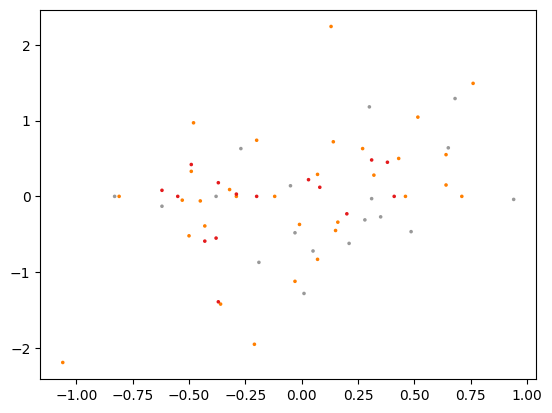

In [23]:
Kmeanscancer = KMeans(init = 'k-means++', n_init = 5, random_state = 200).fit(X_array)
labels_cancer = Kmeansinit1.fit_predict(X_array)

plt.scatter(X_array[:,0], X_array[:,1], c = labels_cancer, s=2.5, cmap='Set1')

###  Exercise 13 (EXTRA)

Plot the two clustering solutions along with a plot of the data colored by the cancer types in the space spanned by the first two principal components.

# Competing the Worksheet

At this point you have hopefully been able to complete all the CORE exercises and attempted the EXTRA ones. Now 
is a good time to check the reproducibility of this document by restarting the notebook's
kernel and rerunning all cells in order.

Before generating the PDF, please go to Edit -> Edit Notebook Metadata and change 'Student 1' and 'Student 2' in the **name** attribute to include your name.

Once that is done and you are happy with everything, you can then run the following cell 
to generate your PDF.

In [26]:
!jupyter nbconvert --to pdf mlp_week03.ipynb

[NbConvertApp] Converting notebook mlp_week03.ipynb to pdf
[NbConvertApp] Support files will be in mlp_week03_files/
[NbConvertApp] Making directory ./mlp_week03_files
[NbConvertApp] Writing 83782 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1001069 bytes to mlp_week03.pdf


zsh:1: command not found: jt
